In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as ply
import plotly.graph_objs as go

Define the "RP GP" kernel as follows:

$k_{RP}(x_1, x_2) = \sum_{j=1}^J \frac{1}{J}\exp(-\frac{1}{2 l_j^2} ||P^{(j)} x_1 - P^{(j)} x_2||_2^2),$

where each $P^{(j)}$ is a $k \times d$ random projection matrix with elements sampled from $\frac{1}{\sqrt{k}}N(0,1)$. Hyerparameters of the kernel are the number of projections $J$, the size of projections $k$, and length scales $l_j$.

For we test each UCI dataset, we test a SE GP and RP GP with $k=1,4,10$ and $J=1,2,3,5,8,13,20$, fitting each length scale, total kernel scale, and observation noise.

For each UCI dataset, for each model, we perform $10$-fold cross-validation twice to calculate a distribution of negative log likelihoods on held out data. 

The hyperparameters are fit using ADAM with learning rate 0.1 and at most 1000 iterations, stopping when the smoothed loss does not decrease by more than 1e-4 in 20 iterations. 

In [12]:
udf = pd.read_csv('./archived_results/unfitted_rp_compare_ablation_results.csv')
fdf = pd.read_csv('./archived_results/fitted_rp_compare_ablation_results.csv')

In [13]:
udf.head()

Unnamed: 0   J     RP  d     dataset error  fold   k       mse   n  repeat  \
0           0 NaN  False  2  challenger   NaN     0 NaN  0.103242  23     0.0   
1           1 NaN  False  2  challenger   NaN     1 NaN  0.074717  23     0.0   
2           2 NaN  False  2  challenger   NaN     2 NaN  0.319614  23     0.0   
3           3 NaN  False  2  challenger   NaN     3 NaN  0.728544  23     0.0   
4           4 NaN  False  2  challenger   NaN     4 NaN  1.290144  23     0.0   

   test_nll  test_nmll  train_nll  train_nmll  train_time  
0  3.414980   1.138327  20.442116    1.008520    0.072985  
1  3.142287   1.047429  20.424284    1.040329    0.100634  
2  3.385299   1.128433  20.406126    1.005870    0.101524  
3  3.857481   1.285827  20.402977    1.027103    0.064252  
4  4.904550   1.634850  19.182606    0.945390    0.058990

In [14]:
udf[pd.notnull(udf['error'])]

Unnamed: 0     J     RP   d     dataset  \
8              8   NaN  False   2  challenger   
9              9   NaN  False   2  challenger   
18             8   1.0   True   2  challenger   
19             9   1.0   True   2  challenger   
28             8   2.0   True   2  challenger   
29             9   2.0   True   2  challenger   
38             8   3.0   True   2  challenger   
39             9   3.0   True   2  challenger   
48             8   5.0   True   2  challenger   
49             9   5.0   True   2  challenger   
58             8   8.0   True   2  challenger   
59             9   8.0   True   2  challenger   
68             8  13.0   True   2  challenger   
69             9  13.0   True   2  challenger   
78             8  20.0   True   2  challenger   
79             9  20.0   True   2  challenger   
88             8   1.0   True   2  challenger   
89             9   1.0   True   2  challenger   
98             8   2.0   True   2  challenger   
99             9   2.0   True   2  challenger   
108            8   3.0   True   2  challenger   
109            9   3.0   True   2  challenger   
118            8   5.0   True   2  challenger   
119            9   5.0   True   2  challenger   
128            8   8.0   True   2  challenger   
129            9   8.0   True   2  challenger   
138            8  13.0   True   2  challenger   
139            9  13.0   True   2  challenger   
148            8  20.0   True   2  challenger   
149            9  20.0   True   2  challenger   
158            8   1.0   True   2  challenger   
159            9   1.0   True   2  challenger   
168            8   2.0   True   2  challenger   
169            9   2.0   True   2  challenger   
178            8   3.0   True   2  challenger   
179            9   3.0   True   2  challenger   
188            8   5.0   True   2  challenger   
189            9   5.0   True   2  challenger   
198            8   8.0   True   2  challenger   
199            9   8.0   True   2  challenger   
208            8  13.0   True   2  challenger   
209            9  13.0   True   2  challenger   
218            8  20.0   True   2  challenger   
219            9  20.0   True   2  challenger   
4479           9  20.0   True  20         sml   

                                                  error  fold     k  mse  \
8     Traceback (most recent call last):\n  File "/h...     8   NaN  NaN   
9     Traceback (most recent call last):\n  File "/h...     9   NaN  NaN   
18    Traceback (most recent call last):\n  File "/h...     8   1.0  NaN   
19    Traceback (most recent call last):\n  File "/h...     9   1.0  NaN   
28    Traceback (most recent call last):\n  File "/h...     8   1.0  NaN   
29    Traceback (most recent call last):\n  File "/h...     9   1.0  NaN   
38    Traceback (most recent call last):\n  File "/h...     8   1.0  NaN   
39    Traceback (most recent call last):\n  File "/h...     9   1.0  NaN   
48    Traceback (most recent call last):\n  File "/h...     8   1.0  NaN   
49    Traceback (most recent call last):\n  File "/h...     9   1.0  NaN   
58    Traceback (most recent call last):\n  File "/h...     8   1.0  NaN   
59    Traceback (most recent call last):\n  File "/h...     9   1.0  NaN   
68    Traceback (most recent call last):\n  File "/h...     8   1.0  NaN   
69    Traceback (most recent call last):\n  File "/h...     9   1.0  NaN   
78    Traceback (most recent call last):\n  File "/h...     8   1.0  NaN   
79    Traceback (most recent call last):\n  File "/h...     9   1.0  NaN   
88    Traceback (most recent call last):\n  File "/h...     8   4.0  NaN   
89    Traceback (most recent call last):\n  File "/h...     9   4.0  NaN   
98    Traceback (most recent call last):\n  File "/h...     8   4.0  NaN   
99    Traceback (most recent call last):\n  File "/h...     9   4.0  NaN   
108   Traceback (most recent call last):\n  File "/h...     8   4.0  NaN   
109   Traceback (most recent call last):\n  File "/h...     9   4.0  NaN   
118

In [15]:
print(udf.loc[4479, 'error'])

Traceback (most recent call last):
  File "/home/ian/Documents/Research/Scalable_GPs/rp_experiments.py", line 158, in run_experiment
    **training_options)
  File "/home/ian/Documents/Research/Scalable_GPs/rp_experiments.py", line 383, in train_additive_rp_gp
    model_metrics['train_nll'] = -likelihood(train_outputs).log_prob(trainY).item()
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/gpytorch/distributions/multivariate_normal.py", line 126, in log_prob
    inv_quad, logdet = covar.inv_quad_logdet(inv_quad_rhs=diff.unsqueeze(-1), logdet=True)
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/gpytorch/lazy/lazy_tensor.py", line 762, in inv_quad_logdet
    )(*args)
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/gpytorch/functions/_inv_quad_log_det.py", line 117, in forward
    eigenvalues, eigenvectors = lanczos_tridiag_to_diag(t_mat)
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-pack

In [16]:
fdf[pd.notnull(fdf['error'])]

Unnamed: 0     J     RP    d     dataset  \
2              2   NaN  False    2  challenger   
9              9   NaN  False    2  challenger   
10            10   NaN  False    2  challenger   
11            11   NaN  False    2  challenger   
12            12   NaN  False    2  challenger   
13            13   NaN  False    2  challenger   
14            14   NaN  False    2  challenger   
15            15   NaN  False    2  challenger   
16            16   NaN  False    2  challenger   
17            17   NaN  False    2  challenger   
18            18   NaN  False    2  challenger   
19            19   NaN  False    2  challenger   
20            20   NaN  False    2  challenger   
21            21   NaN  False    2  challenger   
22            22   NaN  False    2  challenger   
23            23   NaN  False    2  challenger   
24            24   NaN  False    2  challenger   
25            25   NaN  False    2  challenger   
26            26   NaN  False    2  challenger   
27            27   NaN  False    2  challenger   
28            28   NaN  False    2  challenger   
37             8   1.0   True    2  challenger   
38             9   1.0   True    2  challenger   
39            10   1.0   True    2  challenger   
40            11   1.0   True    2  challenger   
41            12   1.0   True    2  challenger   
42            13   1.0   True    2  challenger   
43            14   1.0   True    2  challenger   
44            15   1.0   True    2  challenger   
45            16   1.0   True    2  challenger   
...          ...   ...    ...  ...         ...   
5085           7   3.0   True  126         gas   
5086           8   3.0   True  126         gas   
5087           9   3.0   True  126         gas   
5088          10   3.0   True  126         gas   
5090          12   3.0   True  126         gas   
5091          13   3.0   True  126         gas   
5094          16   3.0   True  126         gas   
5095          17   3.0   True  126         gas   
5097          19   3.0   True  126         gas   
5099           0   5.0   True  126         gas   
5101           2   5.0   True  126         gas   
5102           3   5.0   True  126         gas   
5103           4   5.0   True  126         gas   
5104           5   5.0   True  126         gas   
5107           8   5.0   True  126         gas   
5109          10   5.0   True  126         gas   
5110          11   5.0   True  126         gas   
5111          12   5.0   True  126         gas   
5115          16   5.0   True  126         gas   
5118          19   5.0   True  126         gas   
5123           3   8.0   True  126         gas   
5126           6   8.0   True  126         gas   
5130          10   8.0   True  126         gas   
5132          12   8.0   True  126         gas   
5134           0  13.0   True  126         gas   
5135           1  13.0   True  126         gas   
5138           4  13.0   True  126         gas   
5141           7  13.0   True  126         gas   
5144          10  13.0   True  126         gas   
5145          11  13.0   True  126         gas   

                                                  error  fold    k  mse     n  \
2     Traceback (most recent call last):\n  File "/h...     2  NaN  NaN    23   
9     Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
10    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
11    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
12    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
13    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
14    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
15    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
16    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
17    Traceback (most recent call last):\n  File "/h...     8  NaN  NaN    23   
18    Tracebac

In [17]:
fdf = fdf[pd.isnull(fdf['error'])]

In [18]:
fdf.groupby(('dataset', 'RP', 'k'))['test_nll'].count()

/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


dataset        RP    k   
airfoil        True  1.0     70
                     4.0     70
                     10.0    70
autompg        True  1.0     70
                     4.0     70
                     10.0    70
autos          True  1.0     69
                     4.0     70
                     10.0    70
breastcancer   True  1.0     70
                     4.0     70
                     10.0    70
challenger     True  1.0     56
                     4.0     54
                     10.0    56
concrete       True  1.0     70
                     4.0     70
                     10.0    70
concreteslump  True  1.0     70
                     4.0     70
                     10.0    70
energy         True  1.0     70
                     4.0     67
                     10.0    64
fertility      True  1.0     70
                     4.0     70
                     10.0    69
forest         True  1.0     70
                     4.0     70
                     10.0    70
gas           

In [19]:
def make_plot(k, dataset, robust=True, color='green', plot_bl=True, show_range=True, ds=udf, 
              metric='test_nll'):
    ex = ds[ds['dataset'] == dataset].iloc[0]
    dset = ds[ds['dataset'] == dataset]

    n = ex['n']
    d = ex['d']
    values = dset[~dset['RP']][metric].dropna()
    if not robust:
        bl_middle = values.mean()
        bl_below = bl_middle - 2*values.std()
        bl_above = bl_middle + 2*values.std()

        middle_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].mean()
        below_line = middle_line - 2*dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].std()
        above_line = middle_line + 2*dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].std()
    else:
        middle_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].median()
        below_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].quantile(0.25)
        above_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].quantile(0.75)
    
    if plot_bl:
        try:
            bl_middle = np.median(values)
            bl_below = np.percentile(values, 25)
            bl_above = np.percentile(values, 75)
        except Exception:
            print(k, dataset)
            raise
        plt.axhline(bl_middle, color='blue', label='SE')
        plt.fill_between([0, 20], bl_below, bl_above, color='blue', alpha=0.2)
    
    plt.plot(middle_line.index, middle_line.values, color=color, marker='o', label='RP+SE,k={}'.format(k))
    if show_range:
        plt.fill_between(below_line.index, below_line.values, above_line.values, color=color, alpha=0.2)
    plt.title(dataset + ' (n={}, d={})'.format(n, d))
    plt.xlabel("J")
    plt.ylabel(metric)

In [20]:
ds_by_d = udf.reset_index().groupby('dataset')['d'].first().sort_values()
ds_by_d

dataset
servo              2
challenger         2
airfoil            3
yacht              4
machine            5
concreteslump      5
autompg            5
concrete           6
energy             6
fertility          7
pendulum           7
solar              8
wine               9
stock              9
forest            10
housing           11
skillcraft        17
parkinsons        18
sml               20
autos             22
breastcancer      31
gas              126
Name: d, dtype: int64

# Plots for unfitted kernels
 * It seems that for many datasets, NLL decreases as k and J increase, surpassing the baseline nll.
 * However, with autos as a particular example, the opposite effect can happen.
 * Is this due to not having fit the hyperparameters? Or perhaps because the scale of the kernels are varying?
 * It does not appear to be correlated with higher/lower dataset size or feature set size.

(0, 5000)

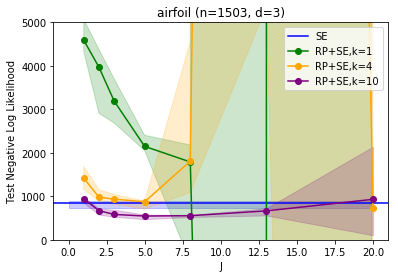

In [62]:
plt.figure()
make_plot(k=1, dataset='airfoil', plot_bl=True)
make_plot(k=4, dataset='airfoil', color='orange', plot_bl=False)
make_plot(k=10, dataset='airfoil', color='purple', plot_bl=False)
plt.legend()
plt.ylim(0, 5000)

(0, 20000)

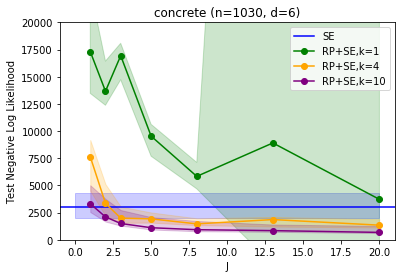

In [60]:
plt.figure()
make_plot(k=1, dataset='concrete', plot_bl=True)
make_plot(k=4, dataset='concrete', color='orange', plot_bl=False)
make_plot(k=10, dataset='concrete', color='purple', plot_bl=False)
plt.legend()
plt.ylim(0, 20000)

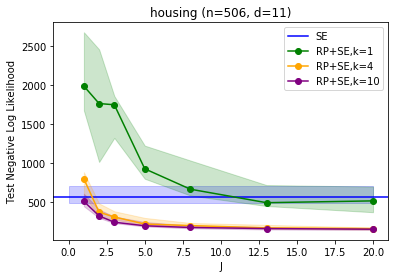

In [76]:
plt.figure()
make_plot(k=1, dataset='housing', plot_bl=True)
make_plot(k=4, dataset='housing', color='orange', plot_bl=False)
make_plot(k=10, dataset='housing', color='purple', plot_bl=False)
plt.legend()
# plt.ylim(0, 5000)

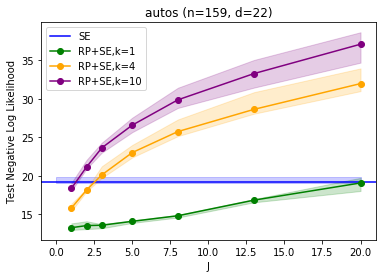

In [74]:
plt.figure()
make_plot(k=1, dataset='autos', plot_bl=True)
make_plot(k=4, dataset='autos', color='orange', plot_bl=False)
make_plot(k=10, dataset='autos', color='purple', plot_bl=False)
plt.legend()
# plt.ylim(0, 5000)

# Unfitted plots with k=1

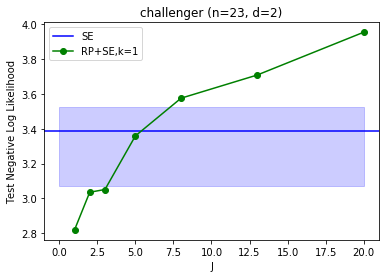

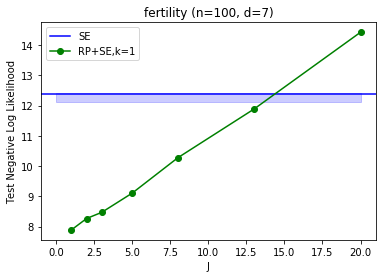

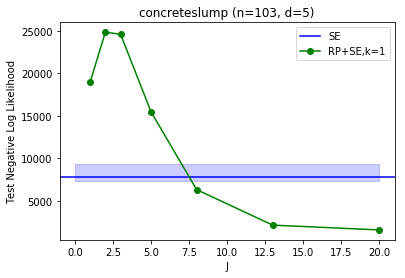

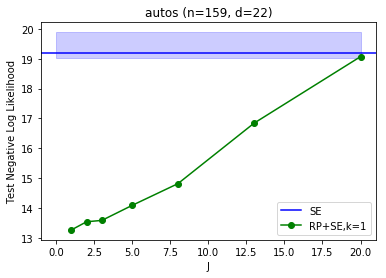

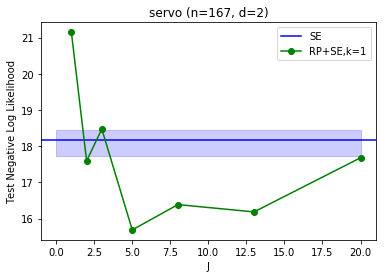

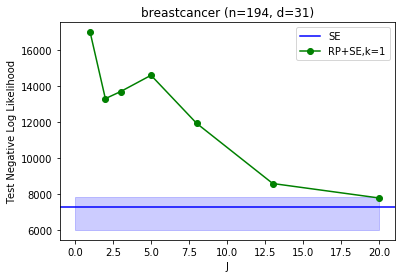

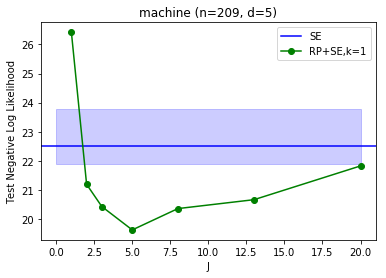

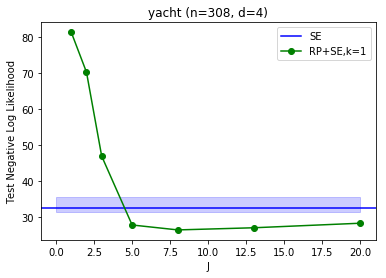

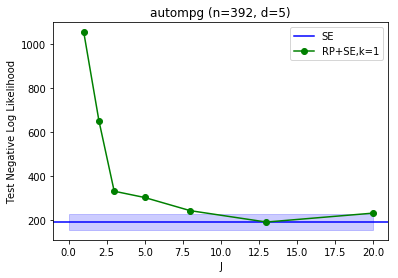

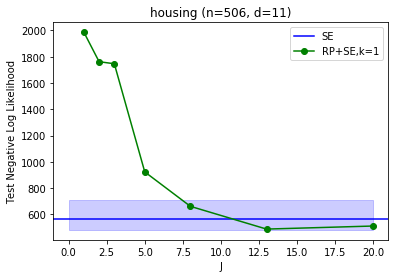

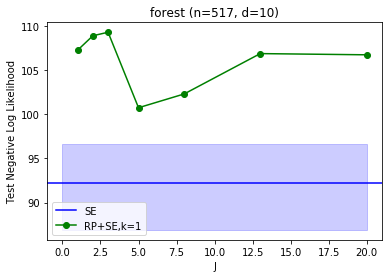

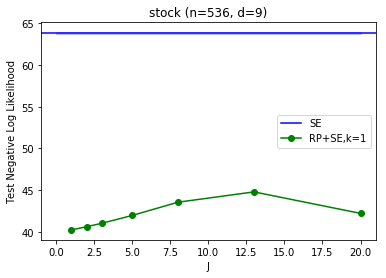

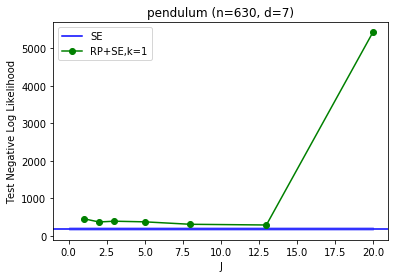

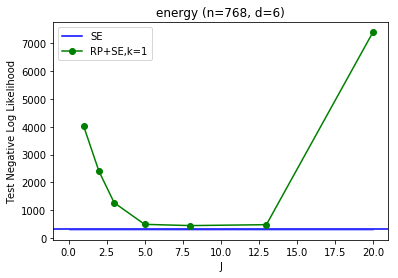

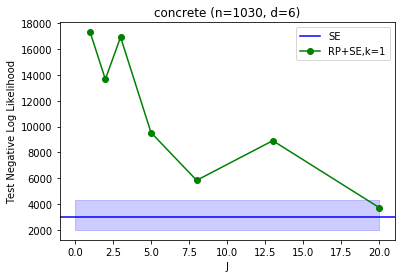

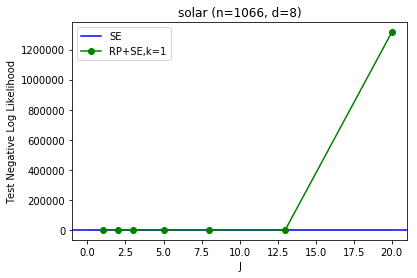

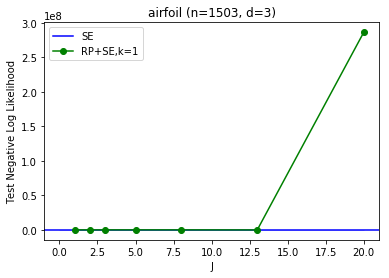

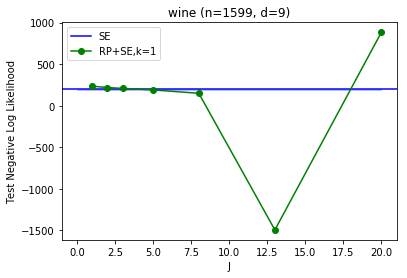

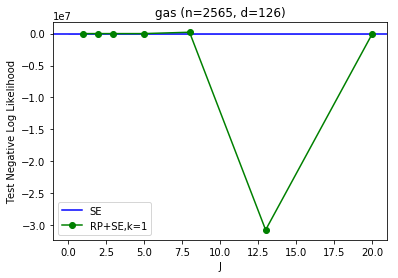

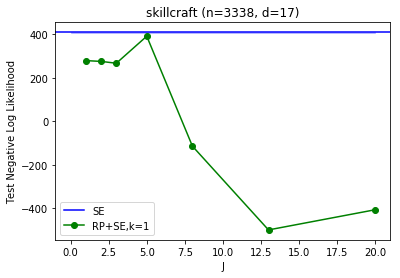

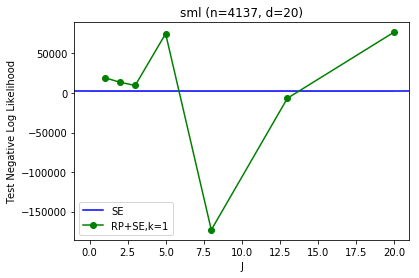

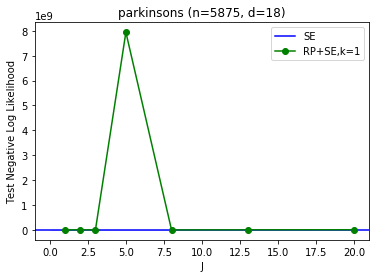

In [68]:
k = 1
for dataset in udf['dataset'].unique():
    plt.figure()
    make_plot(k, dataset, show_range=False)
    plt.legend()

# Unfitted plots with different k using NLL

/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



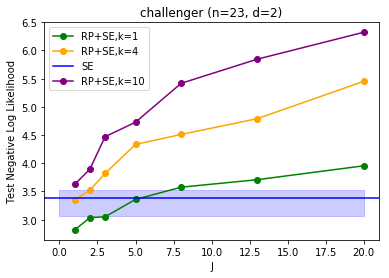

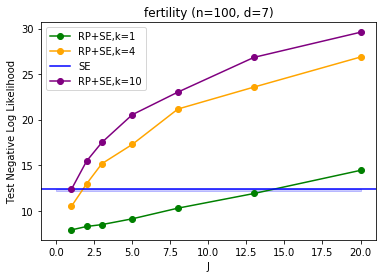

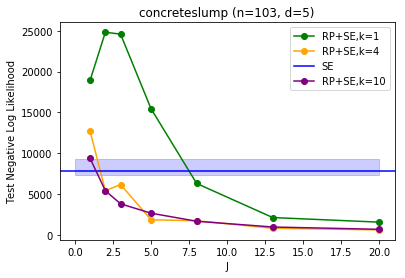

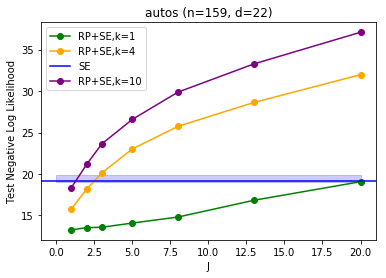

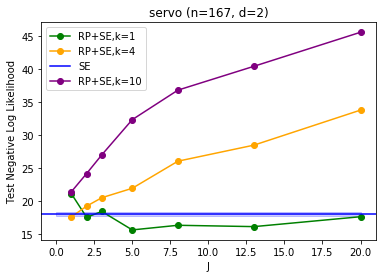

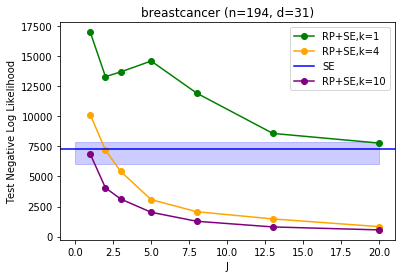

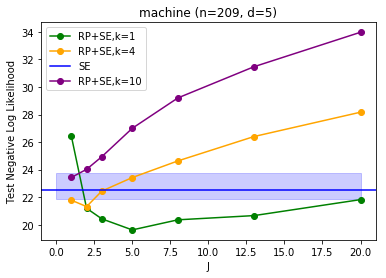

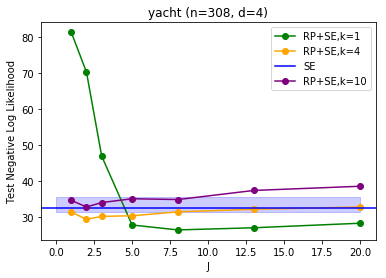

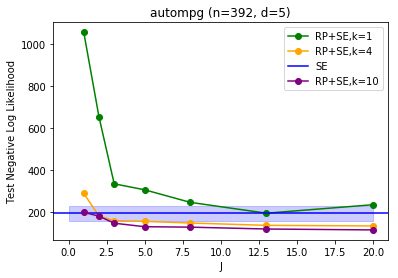

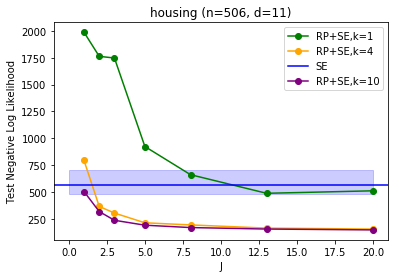

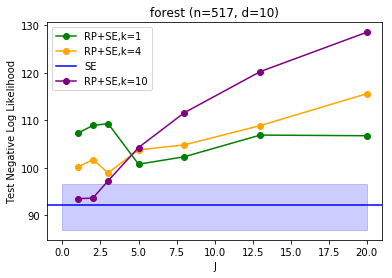

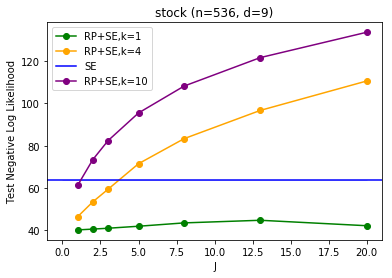

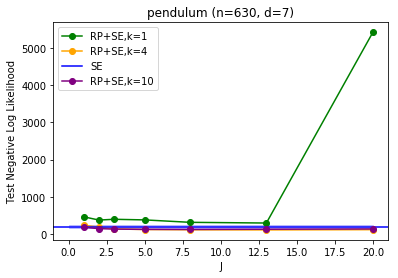

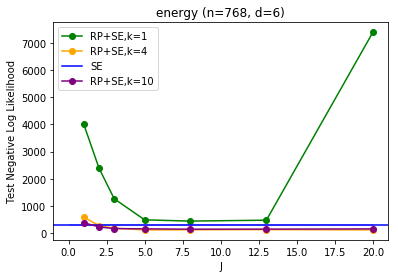

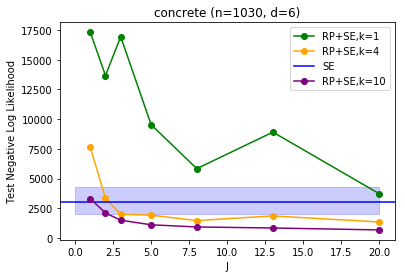

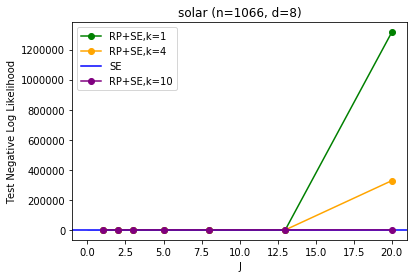

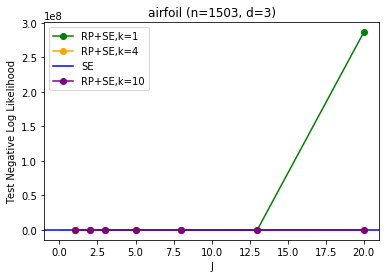

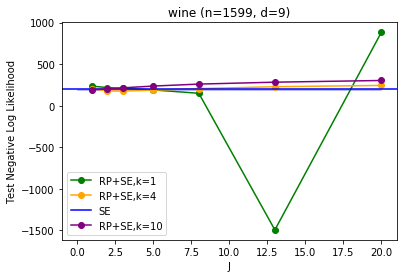

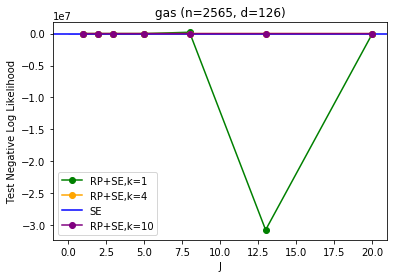

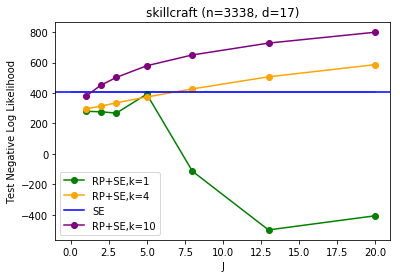

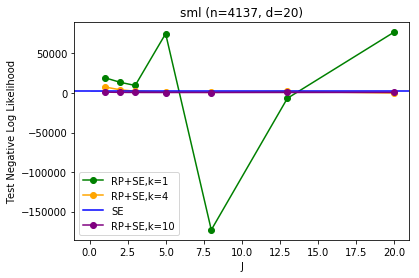

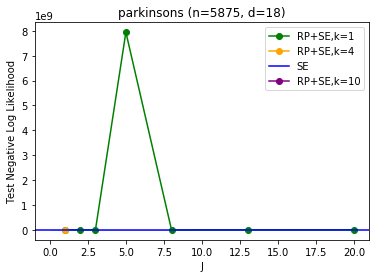

In [146]:
for dataset in udf['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=False, plot_bl=False)
    make_plot(4, dataset, show_range=False, plot_bl=False, color='orange')
    make_plot(10, dataset, show_range=False, plot_bl=True, color='purple')
    plt.legend()

# Unfitted plots with different k using MSE

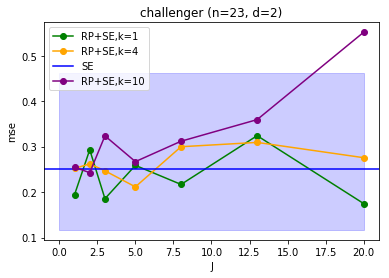

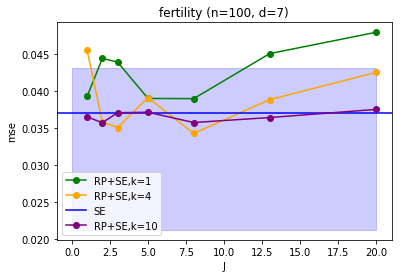

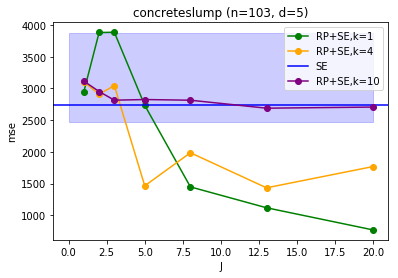

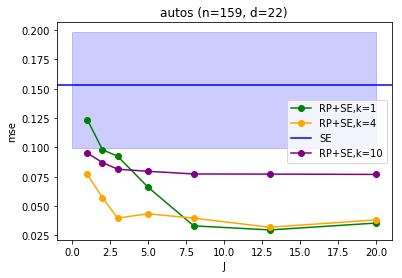

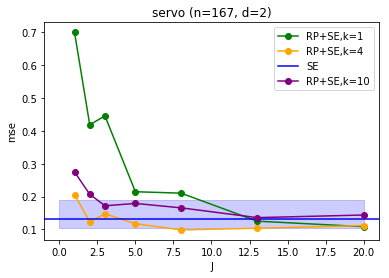

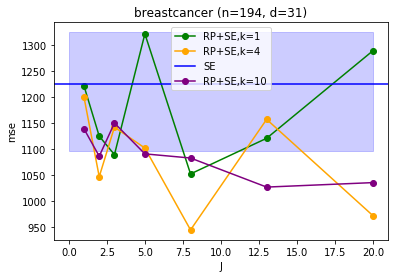

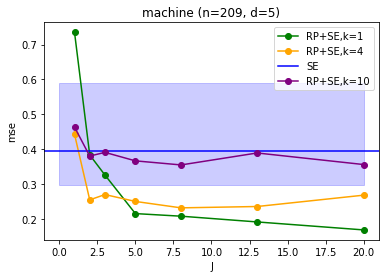

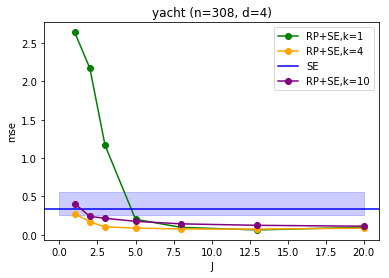

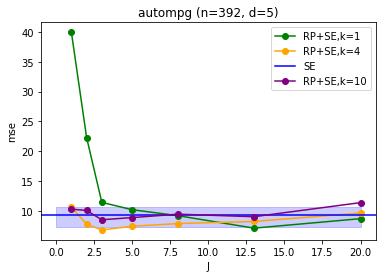

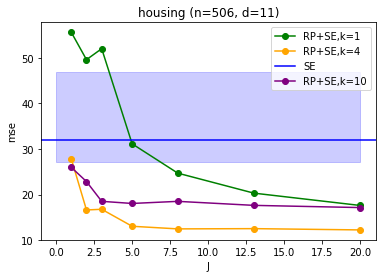

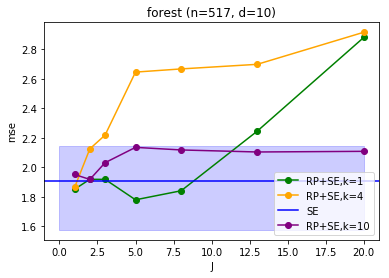

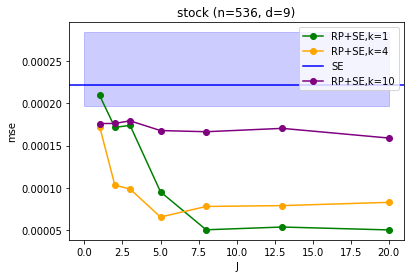

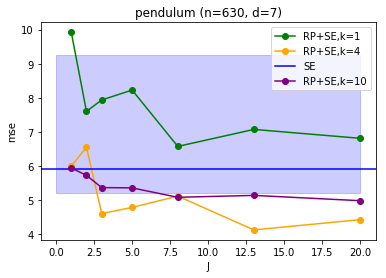

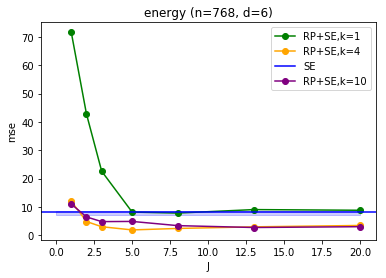

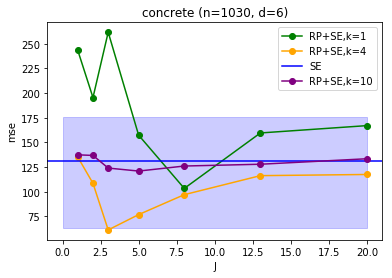

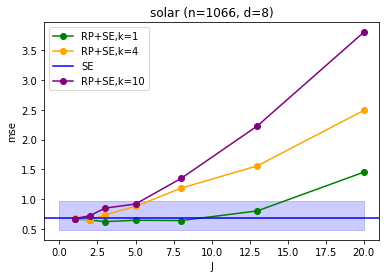

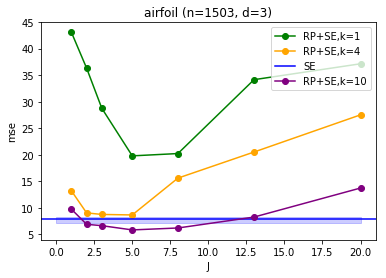

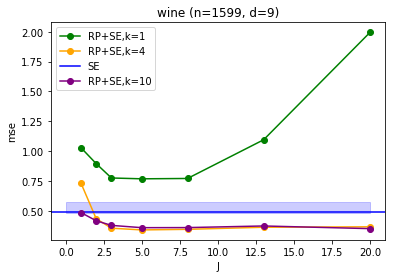

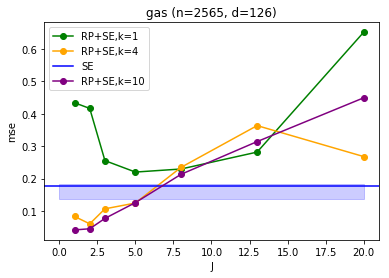

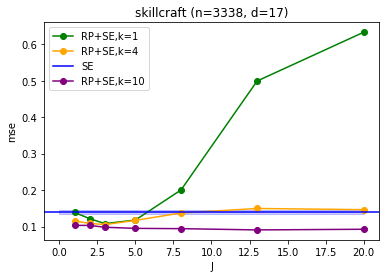

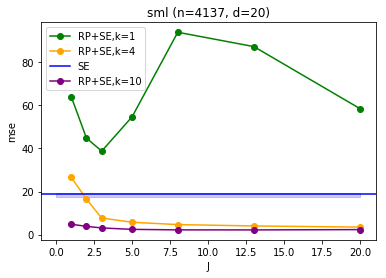

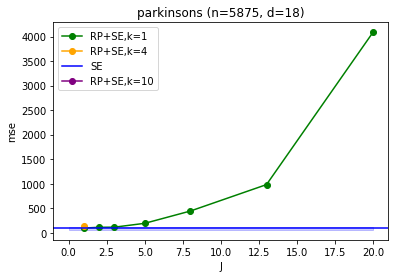

In [191]:
for dataset in udf['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=False, plot_bl=False, ds=udf, metric='mse')
    make_plot(4, dataset, show_range=False, plot_bl=False, color='orange', ds=udf, metric='mse')
    make_plot(10, dataset, show_range=False, plot_bl=True, color='purple', ds=udf, metric='mse')
    plt.legend()

# Example Plots for fitted kernels

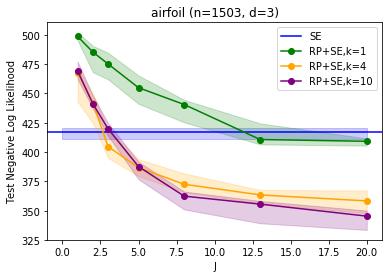

In [84]:
plt.figure()
make_plot(k=1, dataset='airfoil', plot_bl=True, fit=True)
make_plot(k=4, dataset='airfoil', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='airfoil', color='purple', plot_bl=False, fit=True)
plt.legend()
# plt.ylim(0, 5000)

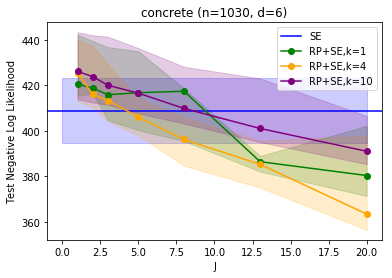

In [85]:
plt.figure()
make_plot(k=1, dataset='concrete', plot_bl=True, fit=True)
make_plot(k=4, dataset='concrete', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='concrete', color='purple', plot_bl=False, fit=True)
plt.legend()
# plt.ylim(0, 20000)

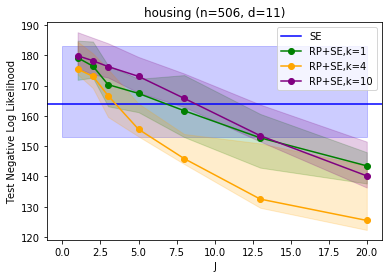

In [86]:
plt.figure()
make_plot(k=1, dataset='housing', plot_bl=True, fit=True)
make_plot(k=4, dataset='housing', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='housing', color='purple', plot_bl=False, fit=True)
plt.legend()
# plt.ylim(0, 5000)

(-100, 200)

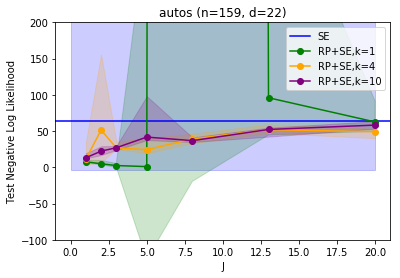

In [100]:
plt.figure()
make_plot(k=1, dataset='autos', plot_bl=True, fit=True)
make_plot(k=4, dataset='autos', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='autos', color='purple', plot_bl=False, fit=True)
plt.legend()
plt.ylim(-100, 200)

# Note that there are some serious problems with training, e.g. with Autos

In [104]:
fdf[(fdf['dataset'] == 'autos') & (fdf['RP']==False)]

Unnamed: 0   J     RP    ...         train_nll     train_nmll train_time
1078           0 NaN  False    ...      4.320297e+03      30.166616   7.385361
1091          13 NaN  False    ...               NaN            NaN   5.565307
1092          14 NaN  False    ...      3.136273e+08      -4.906769   7.931964
1093          15 NaN  False    ...     -2.534464e+06  -16584.371094   6.201168
1102          24 NaN  False    ...      1.173325e+01      -0.408346   8.906313
1107          29 NaN  False    ...               NaN            NaN   8.899178
1108          30 NaN  False    ...               NaN            NaN   6.296147
1110          32 NaN  False    ...               NaN            NaN   7.026748
1114          36 NaN  False    ...     -1.098113e+08  328712.125000  13.638186

[9 rows x 16 columns]

# Fitted NLL k=1

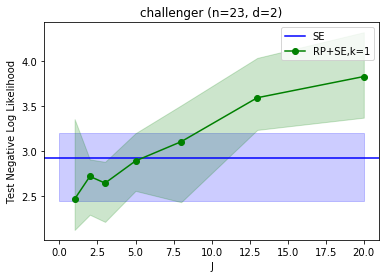

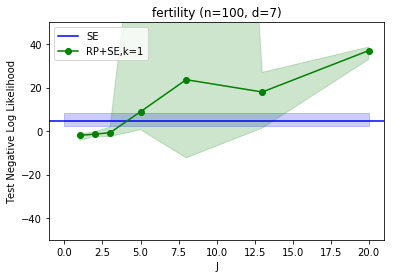

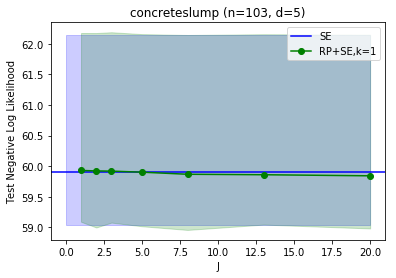

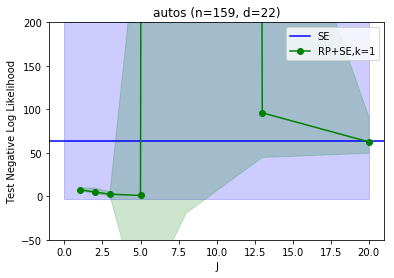

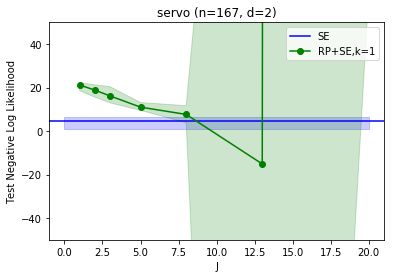

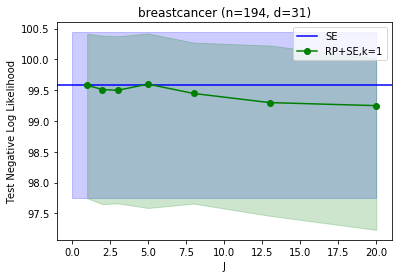

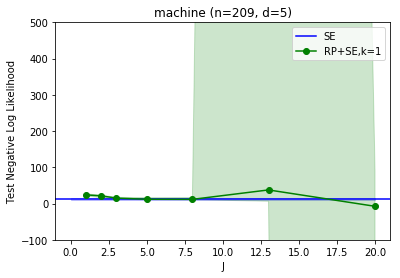

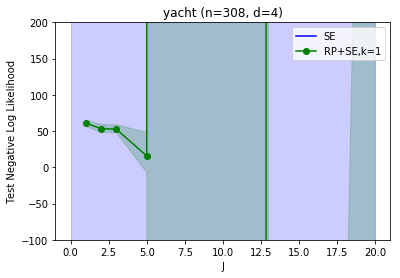

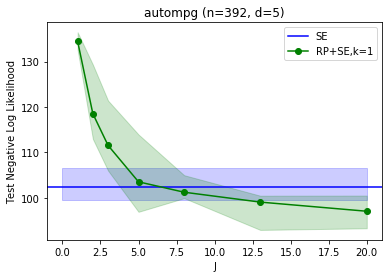

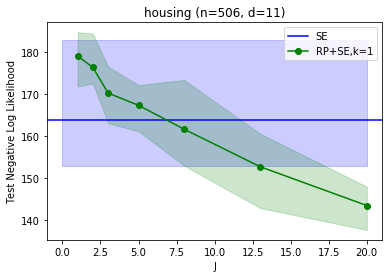

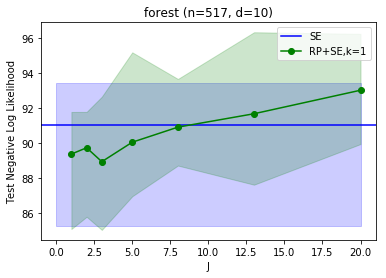

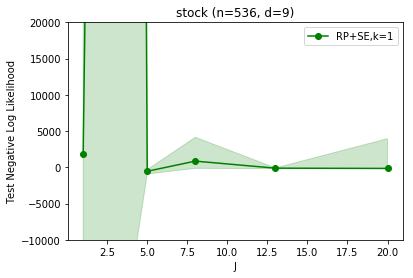

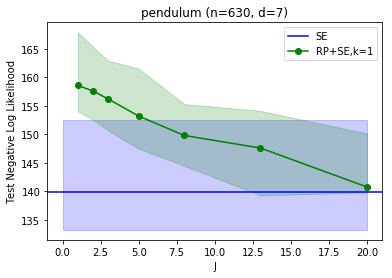

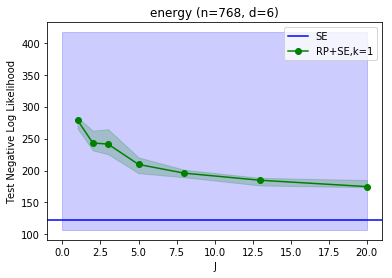

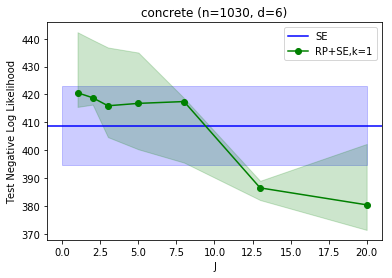

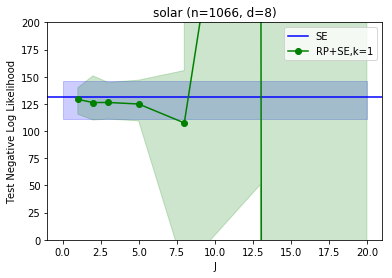

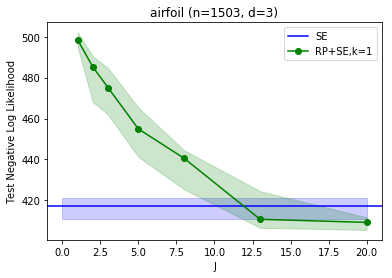

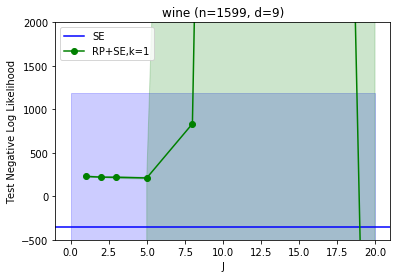

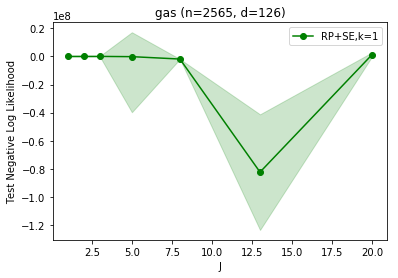

In [138]:
k = 1
maxlim_list = {
    'fertility': (-50,50),
    'autos': (-50, 200), 
    'servo': (-50, 50),
    'machine': (-100, 500),
    'yacht': (-100, 200),
    'stock': (-10000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000)
}
for dataset in fdf['dataset'].unique():
    plt.figure()
    if dataset == 'stock' or dataset == 'gas':
        make_plot(k, dataset, show_range=True, fit=True, plot_bl=False)
    else:
        make_plot(k, dataset, show_range=True, fit=True, plot_bl=True)
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

# Fitted NLL with different k

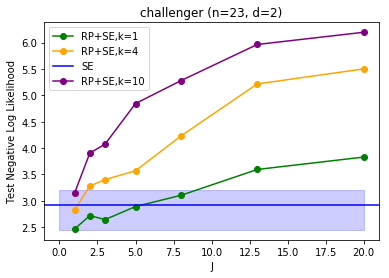

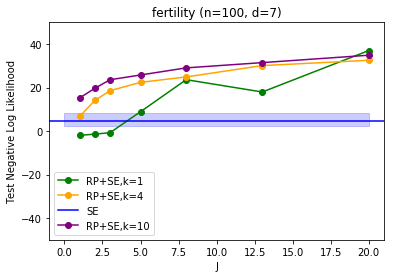

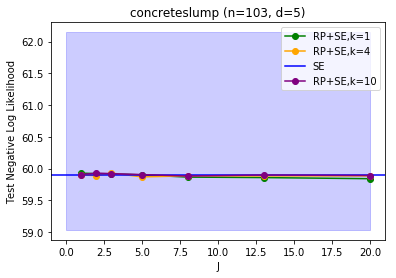

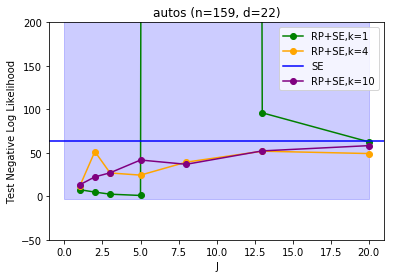

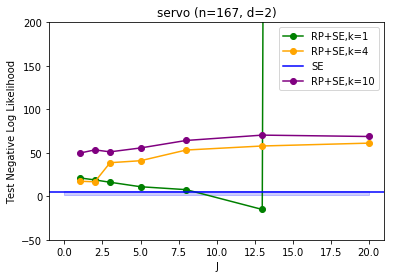

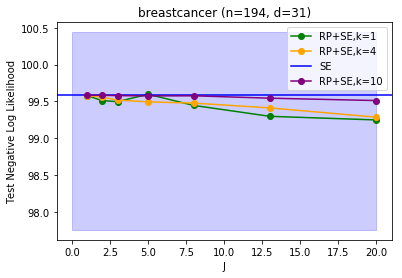

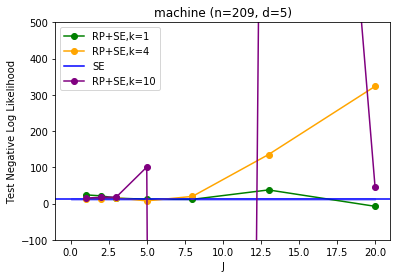

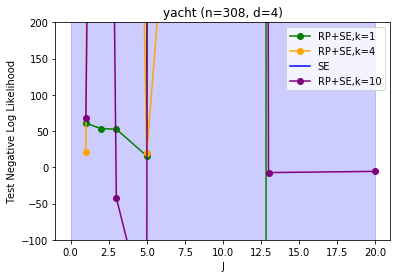

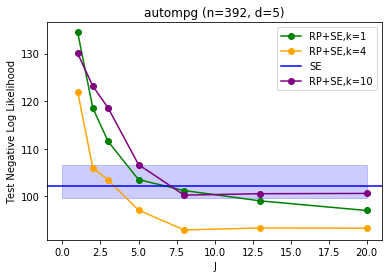

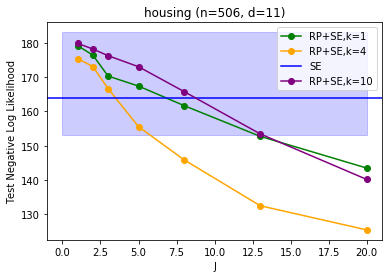

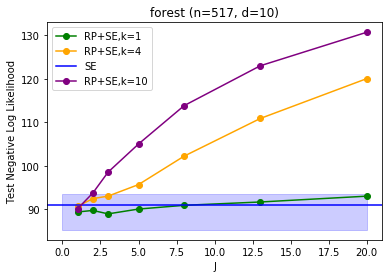

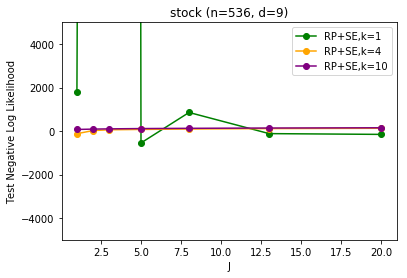

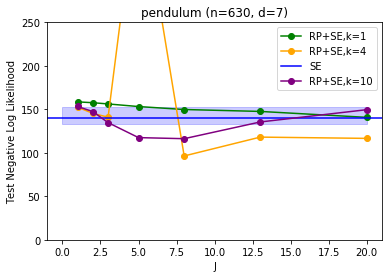

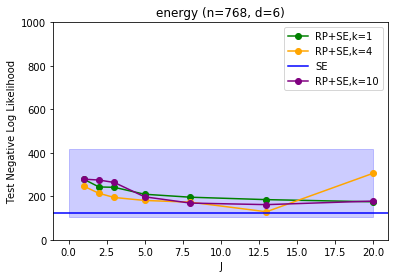

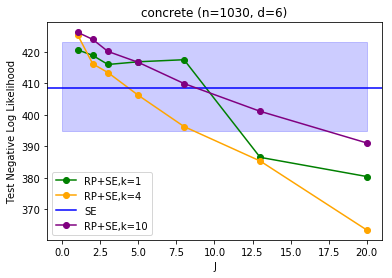

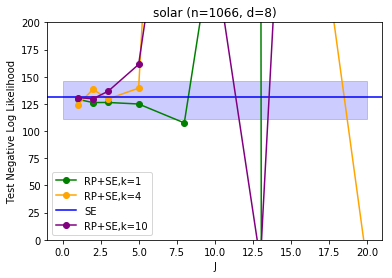

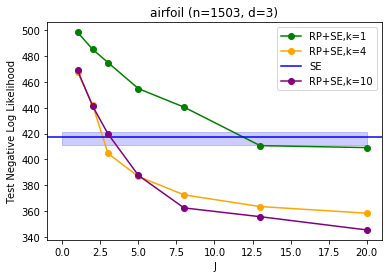

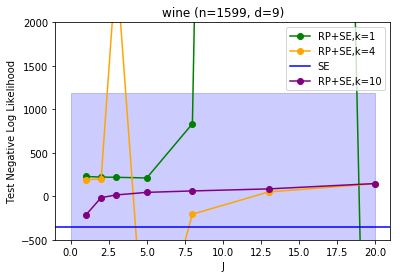

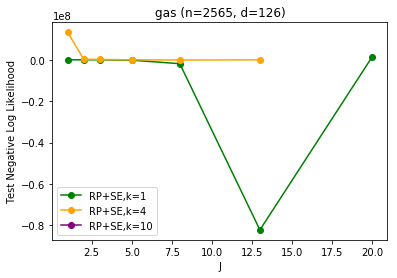

In [148]:
maxlim_list = {
    'fertility': (-50,50),
    'autos': (-50, 200), 
    'servo': (-50, 200),
    'machine': (-100, 500),
    'yacht': (-100, 200),
    'stock': (-5000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000),
    'pendulum': (0, 250),
    'energy': (0, 1000),
}
for dataset in fdf['dataset'].unique():
    plt.figure()
    if dataset == 'stock' or dataset == 'gas':
        make_plot(1, dataset, show_range=False, fit=True, plot_bl=False)
        make_plot(4, dataset, show_range=False, fit=True, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False, fit=True, plot_bl=False, color='purple')
    else:
        make_plot(1, dataset, show_range=False, fit=True, plot_bl=False)
        make_plot(4, dataset, show_range=False, fit=True, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False, fit=True, plot_bl=True, color='purple')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

# Fitted mean squared errors

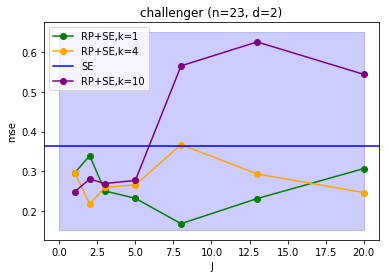

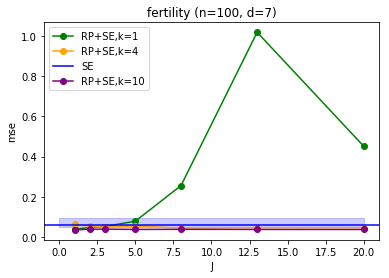

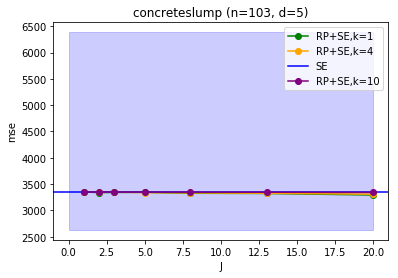

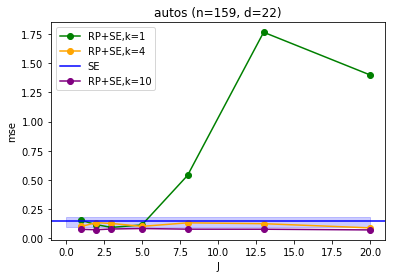

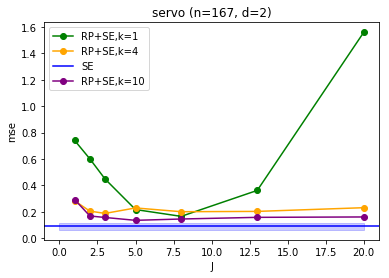

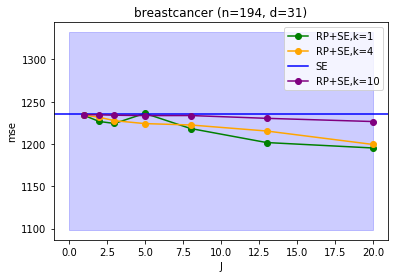

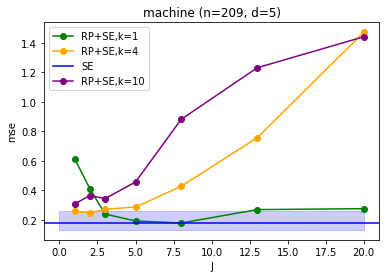

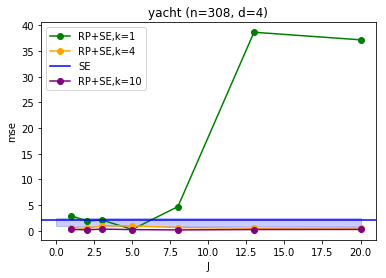

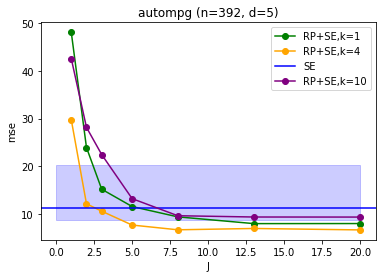

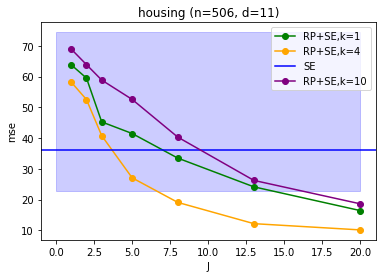

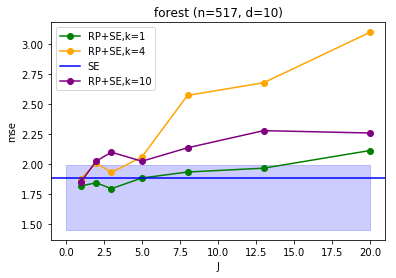

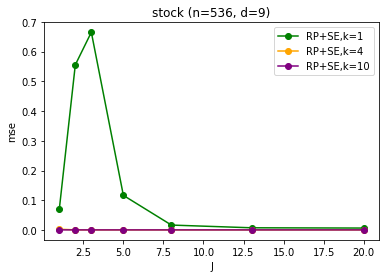

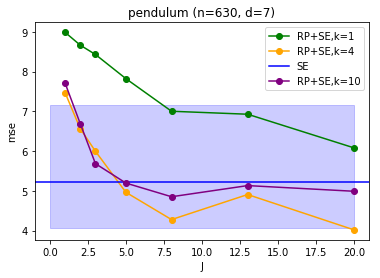

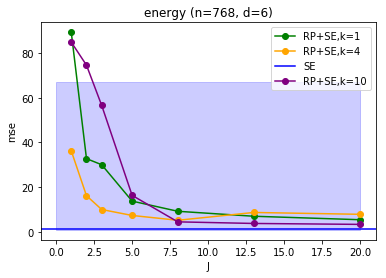

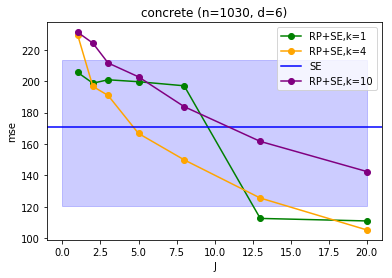

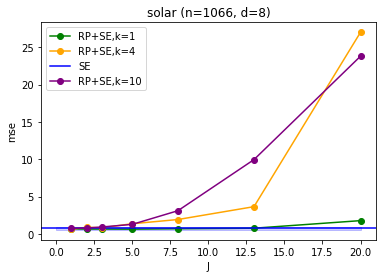

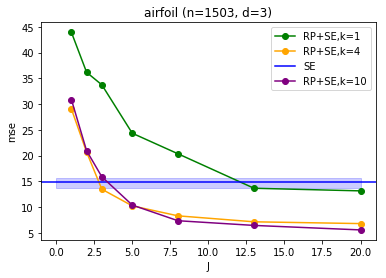

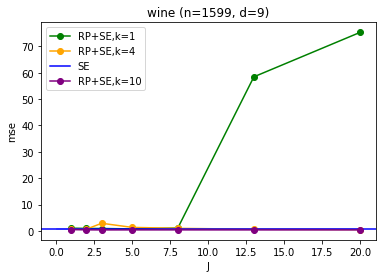

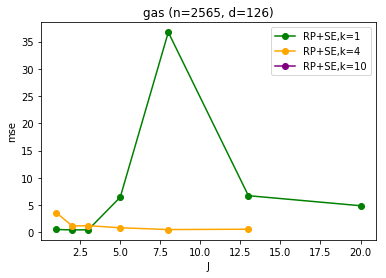

In [194]:
maxlim_list = {
    'fertility': (-50,50),
    'autos': (-50, 200), 
    'servo': (-50, 200),
    'machine': (-100, 500),
    'yacht': (-100, 200),
    'stock': (-5000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000),
    'pendulum': (0, 250),
    'energy': (0, 1000),
}
for dataset in fdf['dataset'].unique():
    plt.figure()
    if dataset == 'stock' or dataset == 'gas':
        make_plot(1, dataset, show_range=False, ds=fdf, plot_bl=False, metric='mse')
        make_plot(4, dataset, show_range=False, ds=fdf, plot_bl=False, color='orange', metric='mse')
        make_plot(10, dataset, show_range=False, ds=fdf, plot_bl=False, color='purple', metric='mse')
    else:
        make_plot(1, dataset, show_range=False, ds=fdf, plot_bl=False, metric='mse')
        make_plot(4, dataset, show_range=False, ds=fdf, plot_bl=False, color='orange', metric='mse')
        make_plot(10, dataset, show_range=False, ds=fdf, plot_bl=True, color='purple', metric='mse')
#     if dataset in maxlim_list.keys():
#         plt.ylim(maxlim_list[dataset])
    plt.legend()

# Plotting scaled versions

In [8]:
import imp
import rp_experiments
import gp_helpers
import pandas as pd
import matplotlib.pyplot as plt
imp.reload(rp_experiments)
imp.reload(gp_helpers)

<module 'gp_helpers' from '/home/ian/Documents/Research/Scalable_GPs/gp_helpers.py'>

In [ ]:
df = pd.read_csv('./full-run-ADAM-smoothed-lowish-cg-tol-noise-prior.csv')

In [254]:
df.loc[df['RP']==False, ['k', 'J']] = 0

In [255]:
df.groupby(('dataset', 'RP', 'k', "J"))['test_nll'].count()

/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



dataset  RP     k     J   
airfoil  False  0.0   0.0     20
         True   1.0   1.0     20
                      2.0     20
                      3.0     20
                      5.0     20
                      8.0     20
                      13.0    20
                      20.0    20
                4.0   1.0     20
                      2.0     20
                      3.0     20
                      5.0     20
                      8.0     20
                      13.0    20
                      20.0    20
                10.0  1.0     20
                      2.0     20
                      3.0     20
                      5.0     20
                      8.0     20
                      13.0    20
                      20.0    20
autompg  False  0.0   0.0     20
         True   1.0   1.0     20
                      2.0     20
                      3.0     20
                      5.0     20
                      8.0     20
                      13.0    20
                

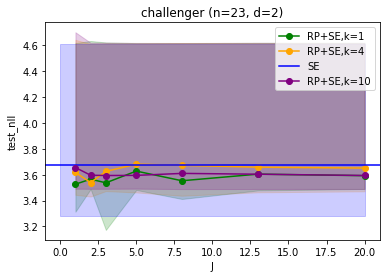

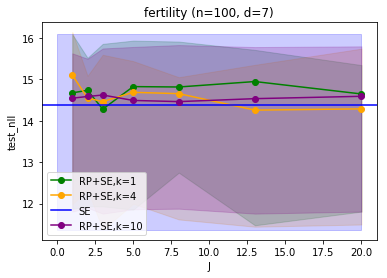

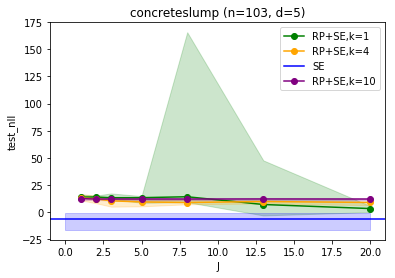

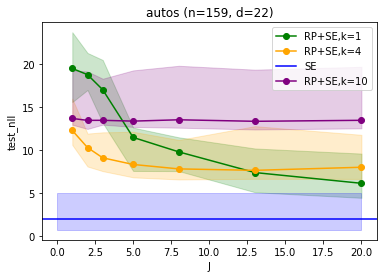

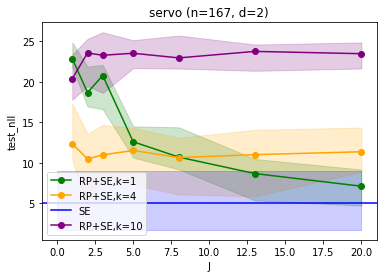

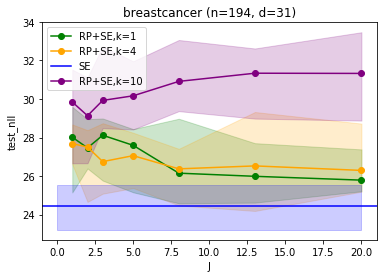

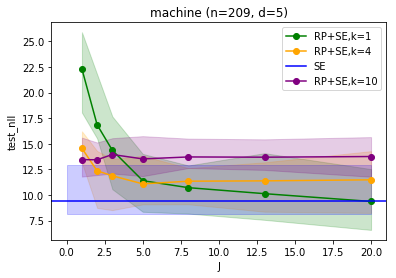

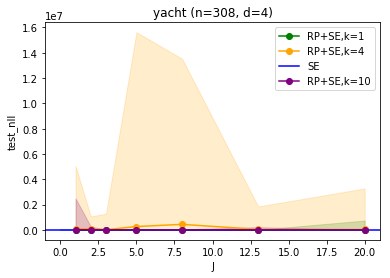

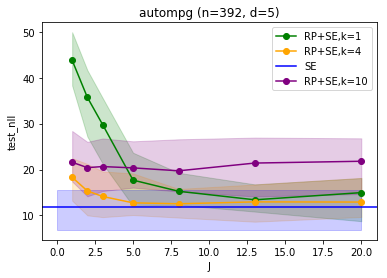

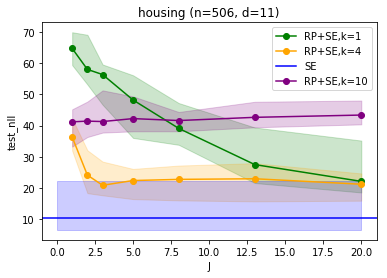

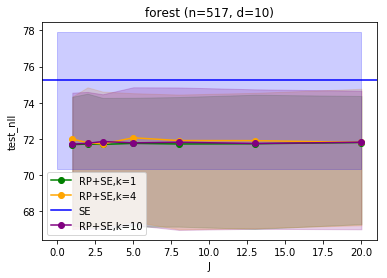

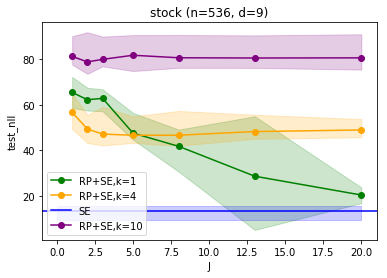

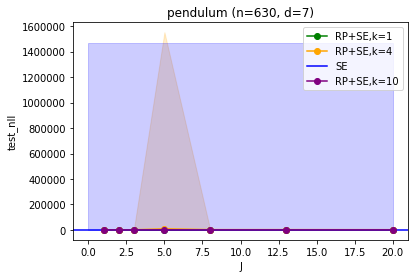

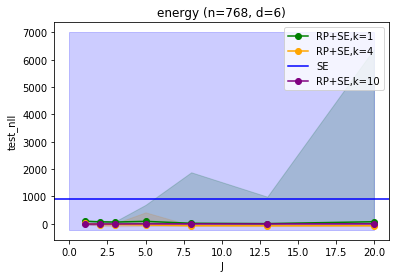

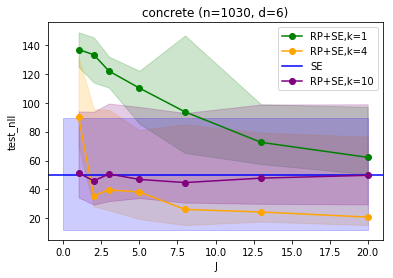

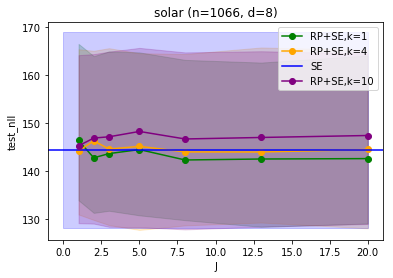

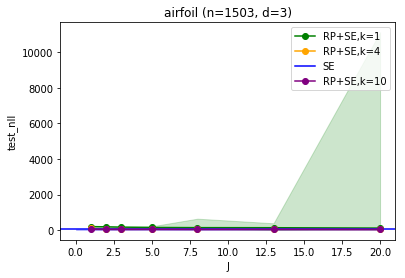

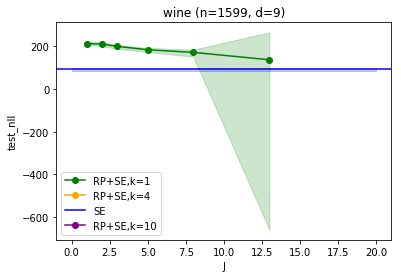

In [256]:
maxlim_list = {}
for dataset in df['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=True,  ds=df, plot_bl=False, robust=True, metric='test_nll')
    make_plot(4, dataset, show_range=True,  ds=df, plot_bl=False, color='orange', robust=True, metric='test_nll')
    make_plot(10, dataset, show_range=True,  ds=df, plot_bl=True, color='purple', robust=True, metric='test_nll')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

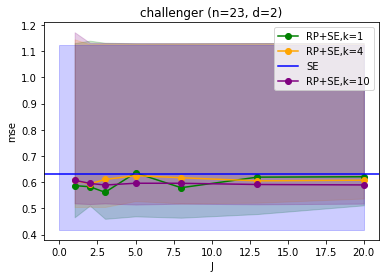

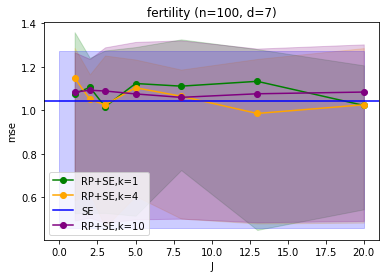

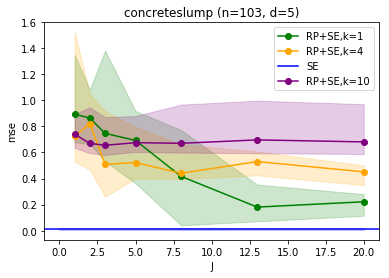

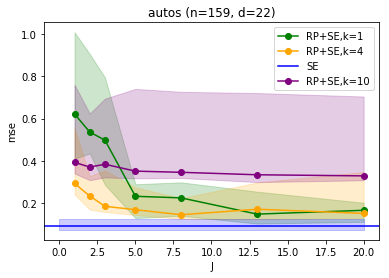

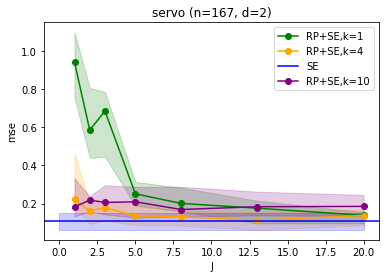

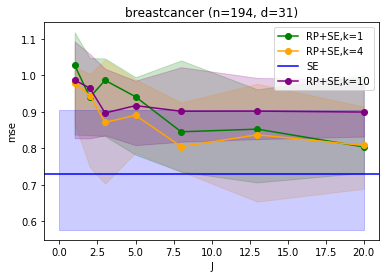

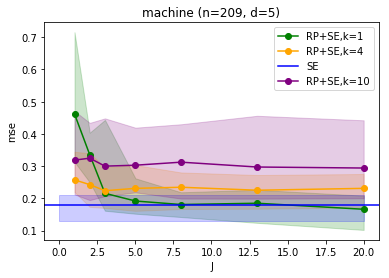

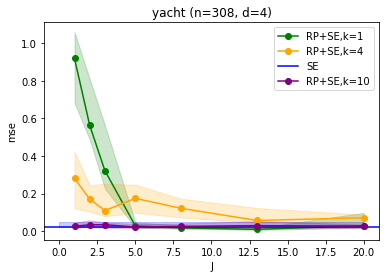

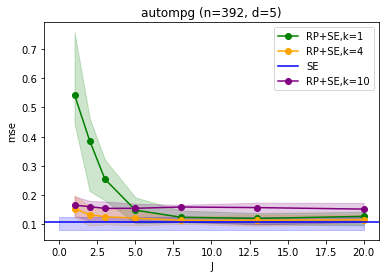

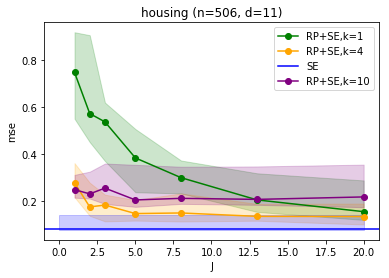

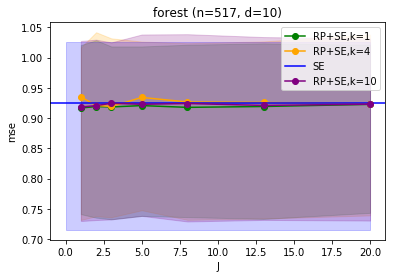

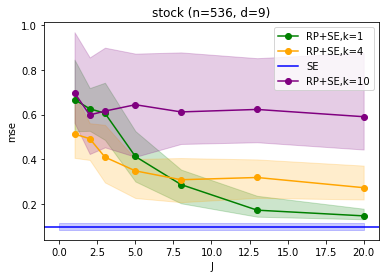

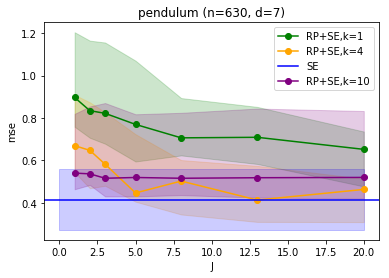

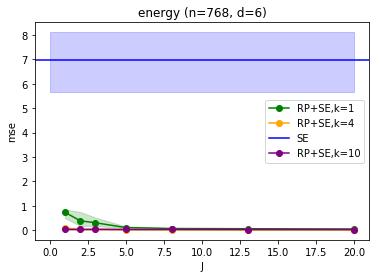

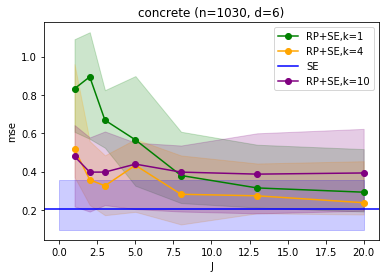

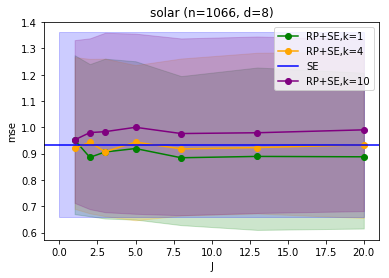

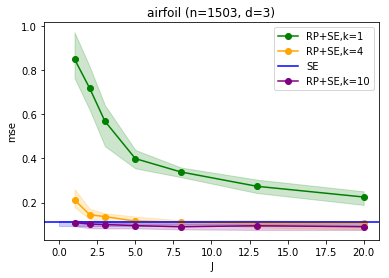

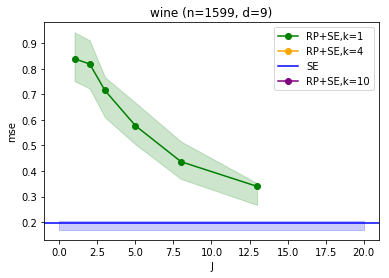

In [257]:
maxlim_list = {
    'gas': (0, 0.2)
}
for dataset in df['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=True,  ds=df, plot_bl=False, robust=True, metric='mse')
    make_plot(4, dataset, show_range=True,  ds=df, plot_bl=False, color='orange', robust=True, metric='mse')
    make_plot(10, dataset, show_range=True,  ds=df, plot_bl=True, color='purple', robust=True, metric='mse')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

In [31]:
df_with_se = pd.read_csv('./full-run-ADAM-smoothed-lowish-cg-tol-noise-prior.csv')
se_runs = df_with_se[df_with_se['RP'] == False]
df = pd.read_csv('./full-correct-proj-scale-full-run-ADAM-smoothed-lowish-cg-tol-noise-prior.csv')
df_extra = pd.read_csv("./simul-correct-proj-scale-full-run-ADAM-smoothed-lowish-cg-tol-noise-prior.csv")
df = df.append(se_runs)
df = df.append(df_extra)

In [32]:
df.loc[df['RP']==False, ['k', 'J']] = 0

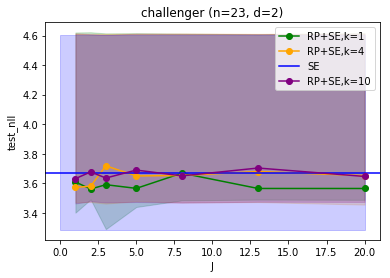

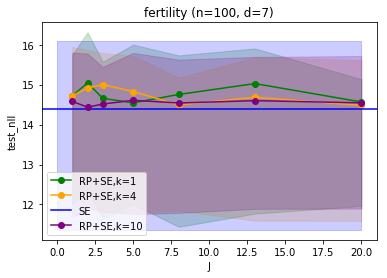

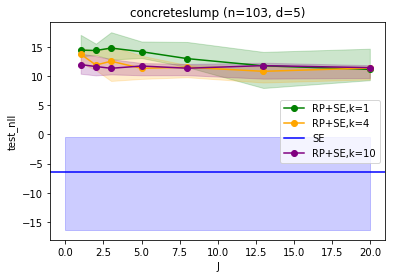

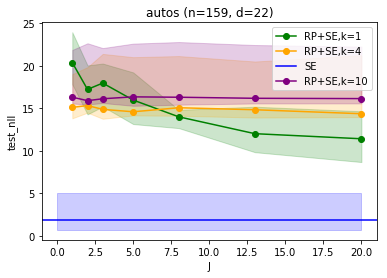

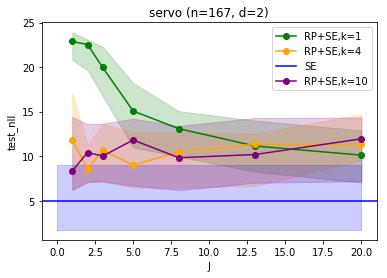

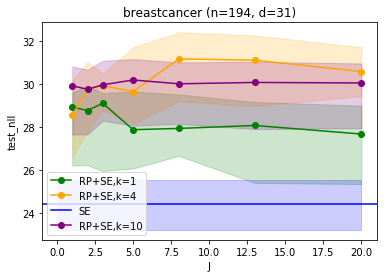

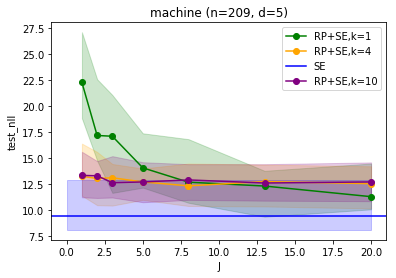

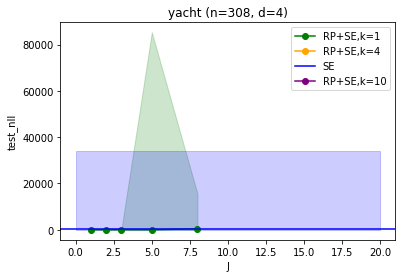

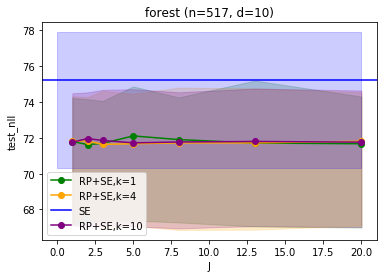

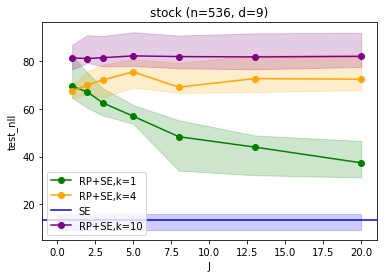

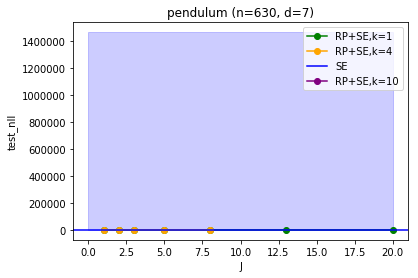

In [33]:
maxlim_list = {}
for dataset in df[df['RP'] == True]['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=True,  ds=df, plot_bl=False, robust=True, metric='test_nll')
    make_plot(4, dataset, show_range=True,  ds=df, plot_bl=False, color='orange', robust=True, metric='test_nll')
    make_plot(10, dataset, show_range=True,  ds=df, plot_bl=True, color='purple', robust=True, metric='test_nll')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

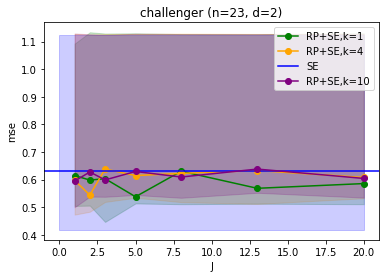

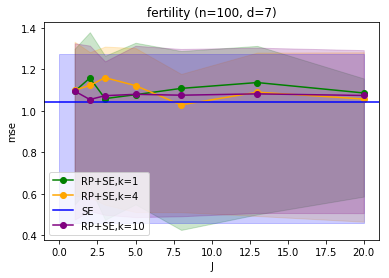

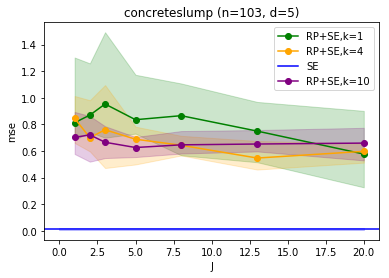

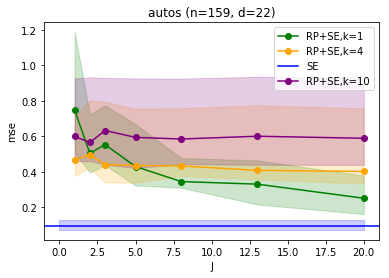

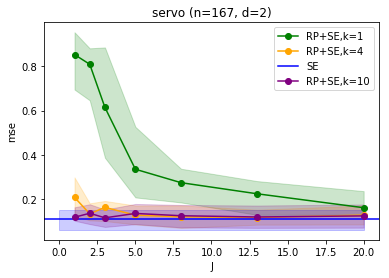

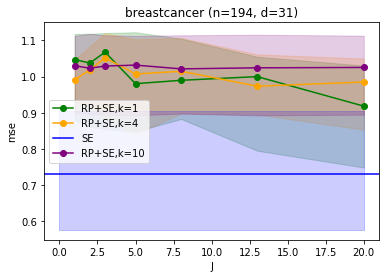

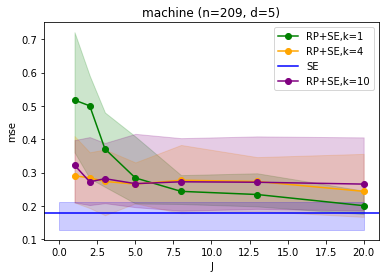

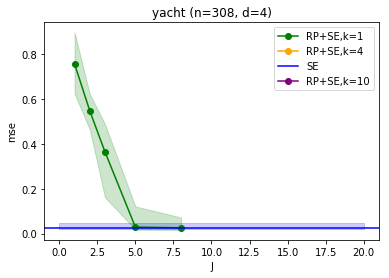

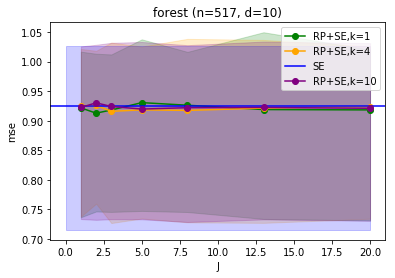

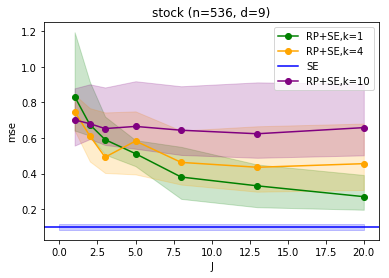

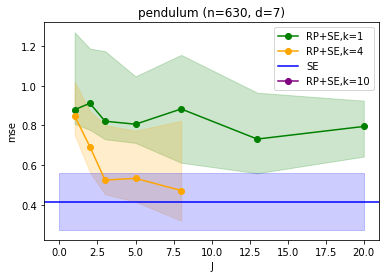

In [34]:
maxlim_list = {
    'gas': (0, 0.2)
}
for dataset in df[df['RP'] == True]['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=True,  ds=df, plot_bl=False, robust=True, metric='mse')
    make_plot(4, dataset, show_range=True,  ds=df, plot_bl=False, color='orange', robust=True, metric='mse')
    make_plot(10, dataset, show_range=True,  ds=df, plot_bl=True, color='purple', robust=True, metric='mse')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

In [35]:
meds = df.groupby(['dataset', 'n', 'd', 'RP', 'k', 'J'])['mse'].median()
# lower = df.groupby(['dataset', 'n', 'd', 'RP', 'k', 'J'])['mse'].quantile(0.05)
# upper = df.groupby(['dataset', 'n', 'd', 'RP', 'k', 'J'])['mse'].quantile(0.95)

In [42]:
meds.index.get_level_values('J')

Float64Index([ 0.0,  0.0,  0.0,  1.0,  2.0,  3.0,  5.0,  8.0, 13.0, 20.0,
              ...
               8.0, 13.0, 20.0,  0.0,  0.0,  1.0,  2.0,  3.0,  5.0,  8.0],
             dtype='float64', name='J', length=224)

In [43]:
meds = meds[meds.index.get_level_values(-1).isin([0,1,8,20])]

In [44]:
meds = meds.unstack(level=[0,1,2]).T

In [47]:
meds = meds.sort_values(by=['d','n'])
meds.dropna(subset=[(True, 10,20)])

RP                       False     True                                 \
k                         0.0       1.0                           4.0    
J                         0.0       1.0       8.0       20.0      1.0    
dataset       n   d                                                      
challenger    23  2   0.631735  0.614588  0.630278  0.585540  0.597159   
servo         167 2   0.111191  0.851835  0.275154  0.162457  0.209189   
concreteslump 103 5   0.010453  0.812877  0.865337  0.576578  0.845064   
machine       209 5   0.178373  0.517507  0.243971  0.201049  0.290569   
fertility     100 7   1.040954  1.093879  1.108262  1.086155  1.099370   
stock         536 9   0.096821  0.833174  0.380532  0.270203  0.748422   
forest        517 10  0.924764  0.921702  0.926202  0.918300  0.924686   
autos         159 22  0.093036  0.747445  0.345367  0.251481  0.467530   
breastcancer  194 31  0.729964  1.047173  0.989702  0.918329  0.991458   

RP                                                                      
k                                             10.0                      
J                         8.0       20.0      1.0       8.0       20.0  
dataset       n   d                                                     
challenger    23  2   0.622447  0.607580  0.594688  0.609227  0.604152  
servo         167 2   0.121501  0.129234  0.119662  0.126381  0.125582  
concreteslump 103 5   0.642757  0.597084  0.702012  0.646031  0.659041  
machine       209 5   0.277331  0.244000  0.322517  0.272608  0.265727  
fertility     100 7   1.028503  1.056826  1.095065  1.075383  1.074009  
stock         536 9   0.462902  0.455694  0.701868  0.643797  0.658348  
forest        517 10  0.917434  0.923947  0.922428  0.922046  0.921062  
autos         159 22  0.433101  0.402135  0.599238  0.584844  0.588958  
breastcancer  194 31  1.014637  0.985015  1.029878  1.021286  1.025198